# Import Libraries

In [1]:
from analysis_functions import *


#from wavelets.wave_python.waveletFunctions import *
print('Loaded')

2025-03-20 10:01:53.267725: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-20 10:01:53.465068: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-20 10:01:53.621878: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-20 10:01:53.784358: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-20 10:01:53.830378: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-20 10:01:56.211302: W tensorflow/compiler/tf2tensorrt/utils/p

Loaded


# Import Signal(s)

In [2]:

data_dir = "../../data/"
suffixes = [f"{i:03d}" for i in range(170)]

sufix = 10
sample = 5  #0 - 9999
fs = 25e6  #sample_frequency
dt = 1/25e6 #period

samples = load_samples(data_dir,f"{sufix:03d}")

# Obtain I[0] and Q[1] signals
i_signal = samples[sample,:,0]
q_signal = samples[sample,:,1]

# Calculate the magnitude and phase of the IQ signal
mag = np.sqrt(q_signal**2 + i_signal**2)
phase = np.arctan2(q_signal, i_signal)

iq_signal = np.array(i_signal + 1J*q_signal, dtype=complex)

print('Done')

Done


# Election of bands

Notes:
To improve: 
- to improve the analisis implement a hamming windoning 

Elección entre Hann y Hamming
Hann: Es preferible cuando se necesita un buen equilibrio entre la reducción del leakage y la resolución espectral. Es común en aplicaciones generales de análisis espectral.

Hamming: Es preferible cuando se necesita una mayor supresión del leakage en frecuencias adyacentes, especialmente en aplicaciones de filtrado y telecomunicaciones.

la funcion esta implementada tiene un error en la muestra de los graficos pero lo que es la parte de procesamiento de la señal esta buena se ubica en test_functions.py


### FFT of each dataset signal

In [3]:
# ---------- COMPUTE THE ELECTIONS OF MAGNITUDE - INSTANTANEUS FREQUENCY BANDS ---------- 
N = len(mag)
n_fft = 1

# Unwrap phase to avoid discontinuities
phase_unwrapped = np.unwrap(phase)
# Apply Savitzky-Golay filter to smooth phase and calculate the instantaneous frequency
phase_diff = savgol_filter(phase_unwrapped, window_length=5, polyorder=2, deriv=1, delta=dt)

# Get the FFT values for the magnitude of the signal
freq_values_mag, fft_values_mag, power_spectrum_mag, magnitude_mag = get_fft_values(mag, fs, pos=True, n_fft=n_fft)
aggregated_vector_mag = magnitude_mag

# Get the FFT values for the instantaneus frequency
freq_values_phase, fft_values_phase, power_spectrum_phase, magnitude_phase  = get_fft_values(phase_diff, fs, pos=True, n_fft=n_fft)
aggregated_vector_phase = magnitude_phase
print('Done')

Done


### Calculation of numbers of peaks

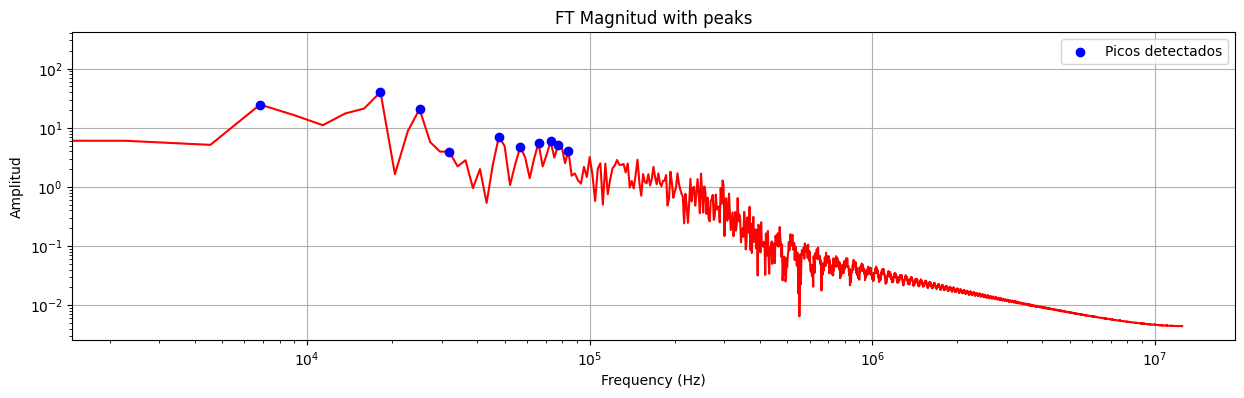

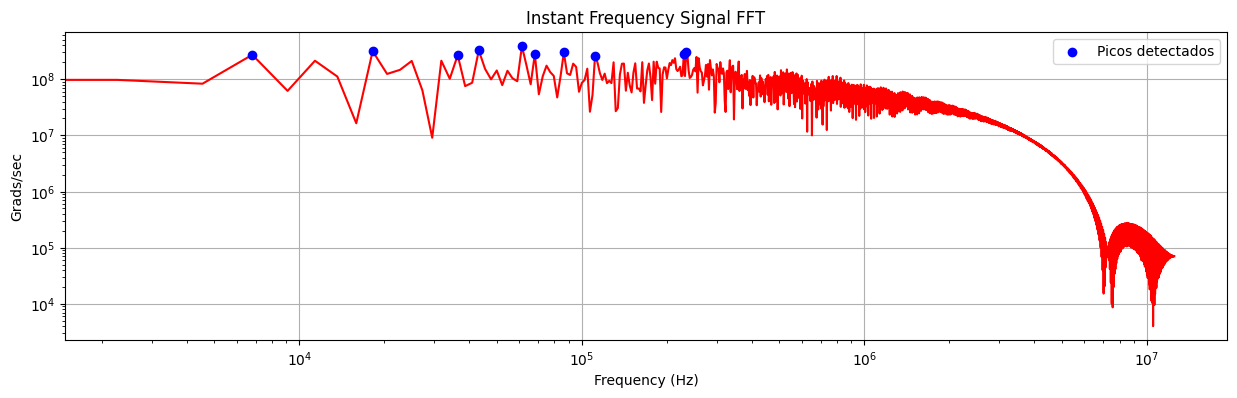

Done


In [4]:
number_peaks = 10


# Find the peaks in the aggregated vectors
#indices_q, values_q, freqs_q = find_peaks_with_frequency(aggregated_vector_q, freq_values_q, N_peaks=number_peaks)
#indices_i, values_i, freqs_i = find_peaks_with_frequency(aggregated_vector_i, freq_values_i, N_peaks=number_peaks)
indices_mag, values_mag, freqs_mag = find_peaks_with_frequency(aggregated_vector_mag, freq_values_mag, N_peaks=number_peaks)
#indices_pow, values_pow, freqs_pow = find_peaks_with_frequency(aggregated_vector_pow, freq_values_mag, N_peaks=number_peaks)
indices_phase, values_phase, freqs_phase = find_peaks_with_frequency(aggregated_vector_phase, freq_values_phase, N_peaks=number_peaks)

# Function to plot the aggregated signal
def plot_agregated_signal(ax, x, y, freq_line=1, name='FFT'):
    ax.plot(x, y, 'r-')
    #ax.axvline(freq_line, color='g', linestyle='--')
    #ax.text(freq_line, 60, f'{freq_line}', rotation=90, horizontalalignment='right', verticalalignment='bottom', color='k')
    ax.semilogx() 
    ax.semilogy() 
    ax.grid(True)
    ax.set_title(name)


# Plot the FFT of the magnitude of the signal
fig, ax = plt.subplots(figsize=(15,4))
plot_agregated_signal(ax, freq_values_mag, aggregated_vector_mag, freq_line=1000000, name='FT Magnitud with peaks')
plt.scatter(freqs_mag, values_mag, color='blue', label="Picos detectados", zorder=5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()



# Plot the FFT of the instant frequency signal
fig, ax = plt.subplots(figsize=(15,4))
plot_agregated_signal(ax, freq_values_phase, aggregated_vector_phase, freq_line=1000000, name='Instant Frequency Signal FFT')
plt.scatter(freqs_phase, values_phase, color='blue', label="Picos detectados", zorder=5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Grads/sec')
plt.legend()
plt.show()


print('Done')


Calculation of the bandwidths for each peak

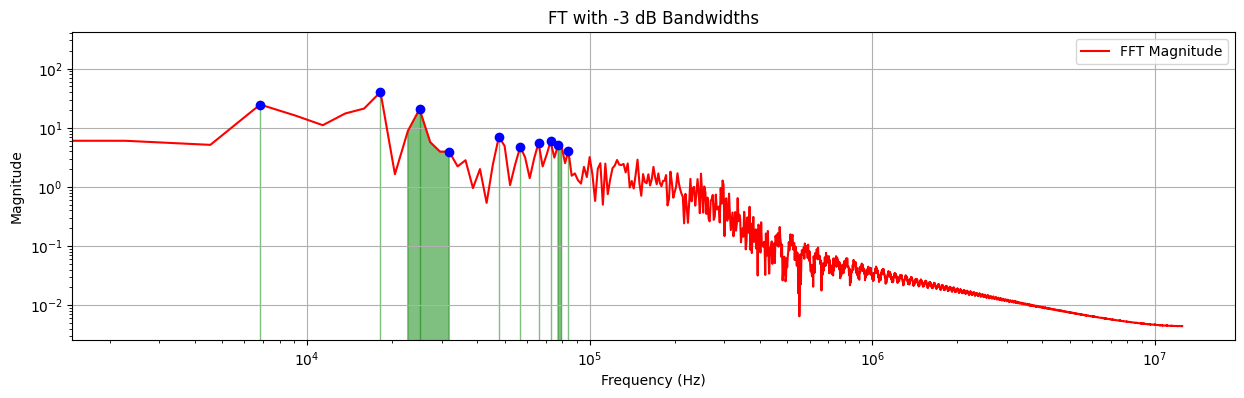

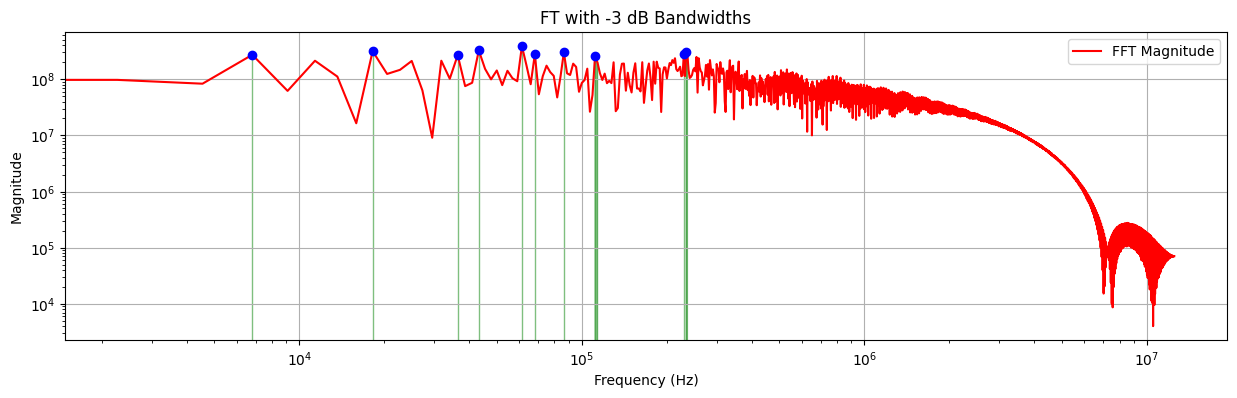

bandwidths_mag


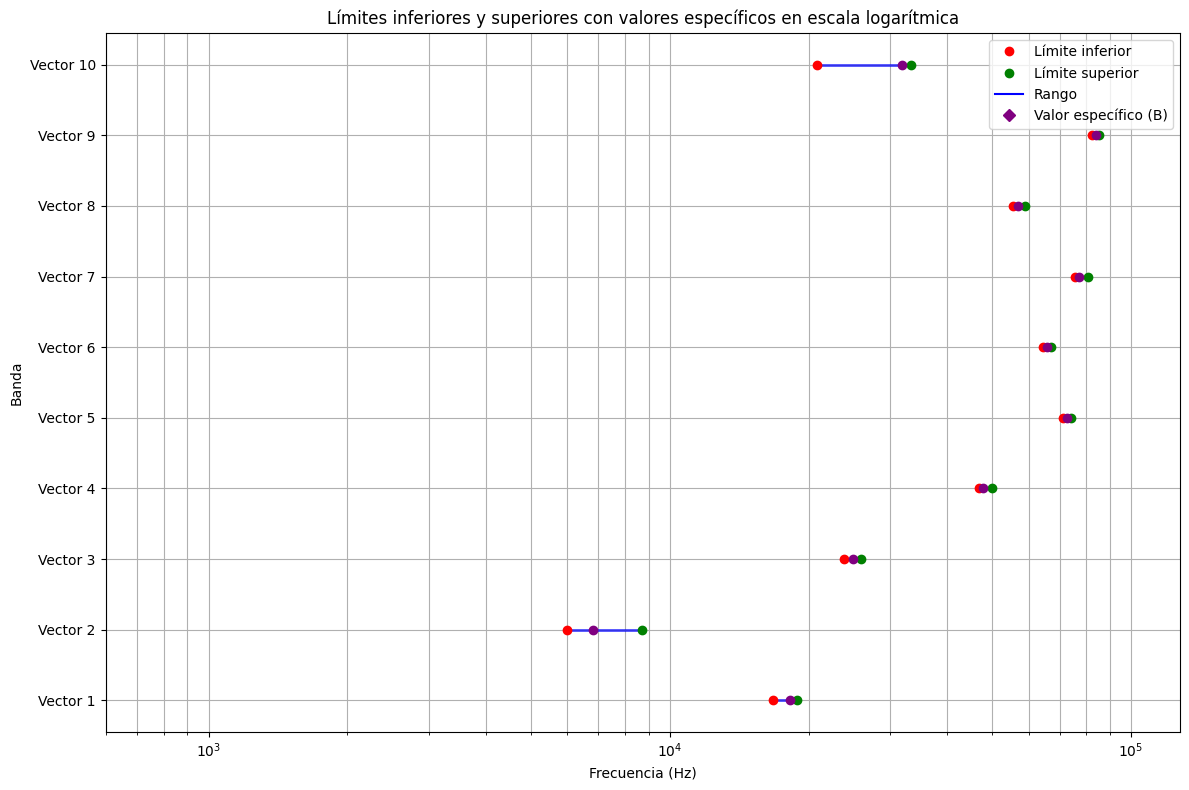

bandwidths_phase


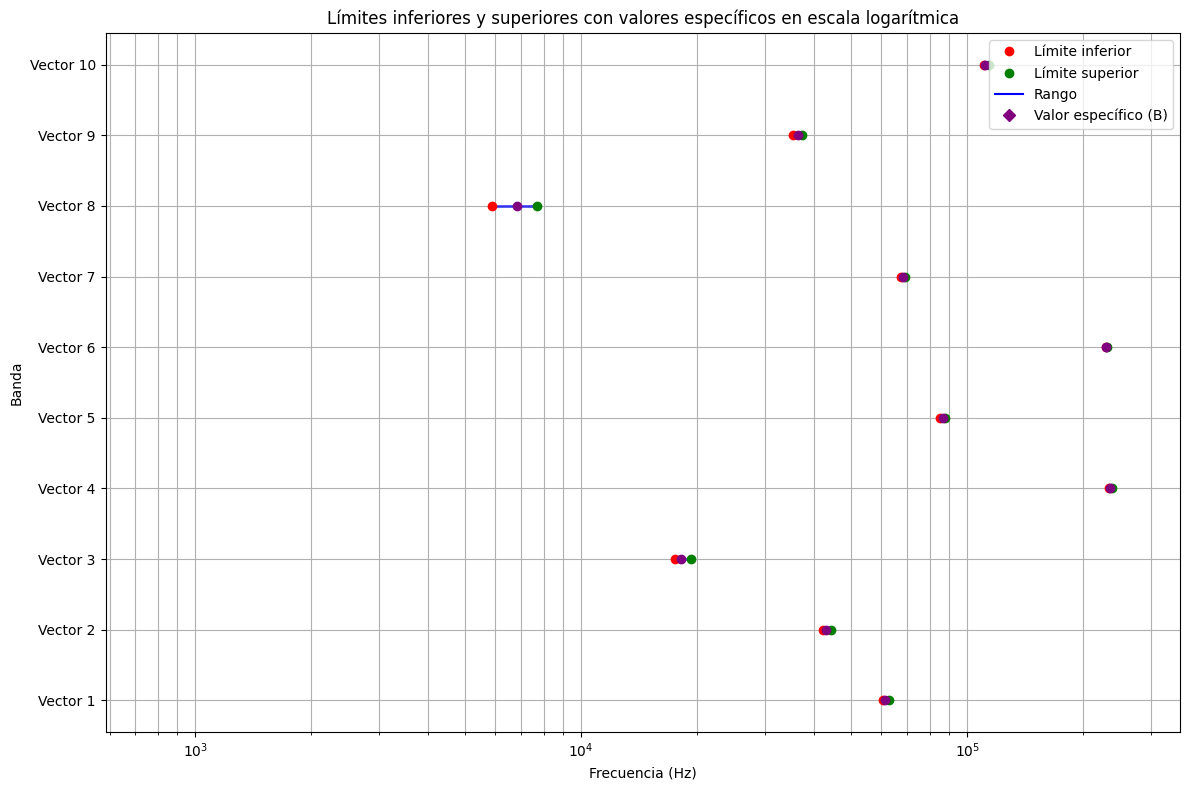

bandwidths_mag
+---------+-------------+------------+----------+-----------+
| Band    |   Low Limit |   Up Limit |       BW |   F. Peak |
+=========+=============+============+==========+===========+
| Band 1  |    16779.21 |   18875.99 |  2096.78 |  18181.82 |
+---------+-------------+------------+----------+-----------+
| Band 2  |     5977.37 |    8724.47 |  2747.10 |   6818.18 |
+---------+-------------+------------+----------+-----------+
| Band 3  |    23839.27 |   25920.48 |  2081.21 |  25000.00 |
+---------+-------------+------------+----------+-----------+
| Band 4  |    46715.13 |   49921.98 |  3206.84 |  47727.27 |
+---------+-------------+------------+----------+-----------+
| Band 5  |    71060.05 |   74153.67 |  3093.62 |  72727.27 |
+---------+-------------+------------+----------+-----------+
| Band 6  |    64436.42 |   67018.10 |  2581.68 |  65909.09 |
+---------+-------------+------------+----------+-----------+
| Band 7  |    75515.70 |   80821.74 |  5306.04 |  7727

In [5]:
umbral = 0.707

# Bandwidth for magnitude 
bandwidths_mag = compute_bandwidth_t(freq_values_mag, aggregated_vector_mag, freqs_mag, umbral)
plot_fft_with_bandwidths(freq_values_mag, aggregated_vector_mag, bandwidths_mag, freqs_mag, values_mag)


# Bandwidth for instant frequency 
bandwidths_phase = compute_bandwidth_t(freq_values_phase, aggregated_vector_phase, freqs_phase, umbral)
plot_fft_with_bandwidths(freq_values_phase, aggregated_vector_phase, bandwidths_phase, freqs_phase, values_phase)

print("bandwidths_mag")    
# Llamar a la función
fig, ax = plot_ranges_and_points_log_scale(bandwidths_mag, freqs_mag)

# Mostrar el gráfico
plt.show()


print("bandwidths_phase")  
# Llamar a la función
fig, ax = plot_ranges_and_points_log_scale(bandwidths_phase, freqs_phase)

# Mostrar el gráfico
plt.show()

print("bandwidths_mag")
tabla_bandas_transpuesta(bandwidths_mag, freqs_mag)

print("bandwidths_phase")
tabla_bandas_transpuesta(bandwidths_phase, freqs_phase)


# Calculation of PSD

## Select signal y el Problema con el Cálculo de la Fase
La fase de una señal IQ se calcula mediante la siguiente expresión:

\[
\theta[n] = \tan^{-1}\left(\frac{Q[n]}{I[n]}\right)
\]

Donde:
- \(I[n]\): Componente en fase (In-phase)
- \(Q[n]\): Componente en cuadratura (Quadrature)

Sin embargo, al usar la función `atan2(Q, I)` en lenguajes como Python, los valores de la fase se devuelven en el rango:

\[
[-\pi, \pi]
\]

### Problema Identificado
Esto genera **saltos bruscos** en la fase cuando el valor cruza los límites del rango, por ejemplo:
- De \(\pi\) a \(-\pi\)
- De \(-\pi\) a \(\pi\)

Estos saltos no reflejan el comportamiento continuo real de la fase, lo que puede introducir errores en el análisis de señales.

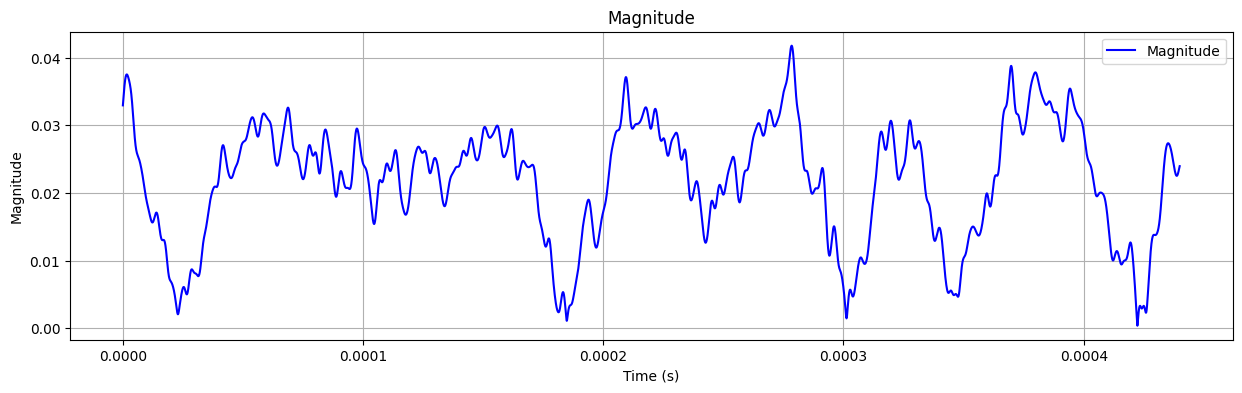

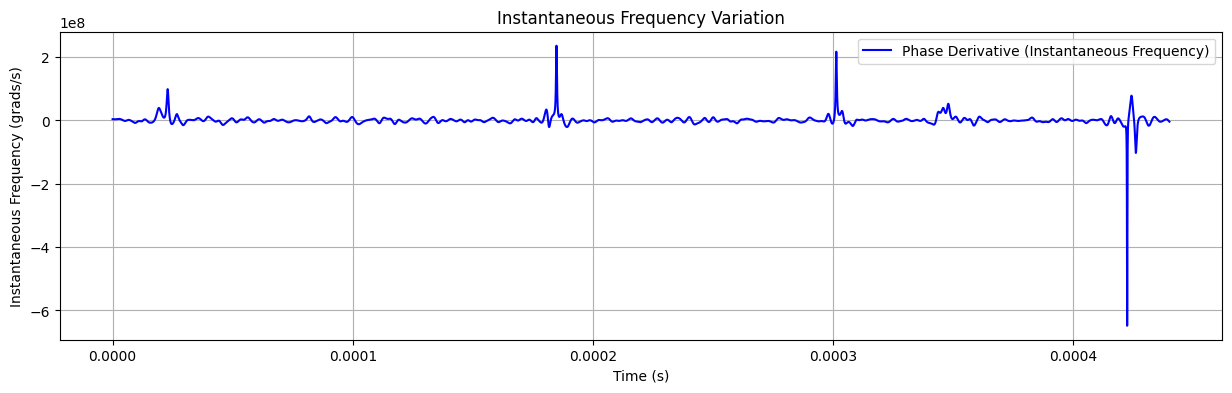

In [6]:
# Unwrap phase to avoid discontinuities
phase_unwrapped = np.unwrap(phase)

# Apply Savitzky-Golay filter to smooth phase and calculate the instantaneous frequency
phase_diff = savgol_filter(phase_unwrapped, window_length=5, polyorder=2, deriv=1, delta=dt)


# Plot the phase derivative
time_axis = np.arange(len(mag)) / fs  # Time in seconds
plt.figure(figsize=(15, 4))
plt.plot(time_axis, mag, label="Magnitude", color='b')
plt.xlabel("Time (s)")
plt.ylabel("Magnitude")
plt.title("Magnitude")
plt.grid()
plt.legend()
plt.show()

# Generate time axis (one sample less due to differentiation)
time_axis = np.arange(len(phase_diff)) / fs  # Time in seconds
phase_diff_deg = np.rad2deg(phase_diff)  # Convierte de radianes a grados
# Plot the phase derivative
plt.figure(figsize=(15, 4))
plt.plot(time_axis, phase_diff_deg, label="Phase Derivative (Instantaneous Frequency)", color='b')
plt.xlabel("Time (s)")
plt.ylabel("Instantaneous Frequency (grads/s)")
plt.title("Instantaneous Frequency Variation")
plt.grid()
plt.legend()
plt.show()


## Compute FIR Filters per each bandwidth

In [7]:

# Aplicar los filtros
senales_filtradas_mag = fir_hamming_filters(mag, fs, bandwidths_mag)
senales_filtradas_phase = fir_hamming_filters(phase_diff, fs, bandwidths_phase) 

## Plot the filtered signals

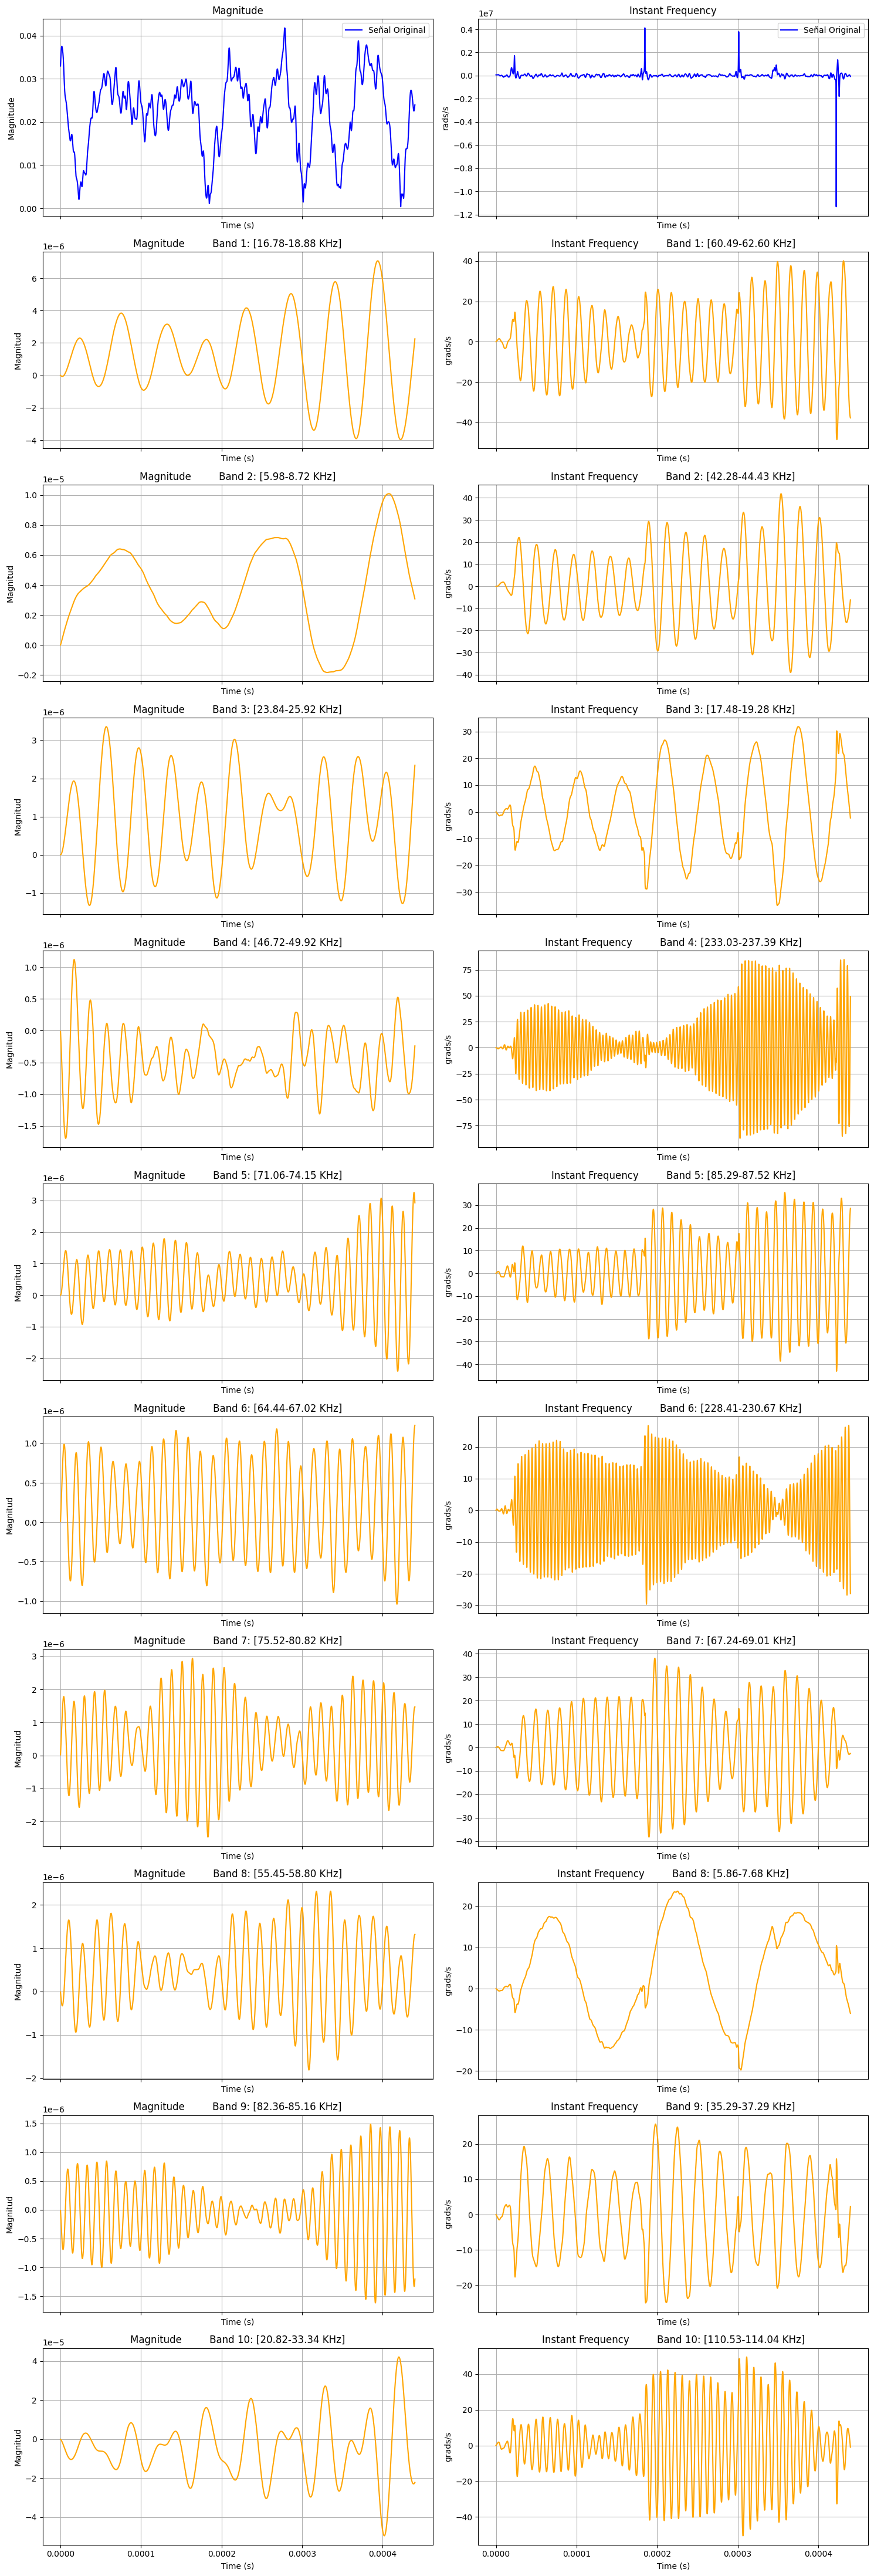

In [8]:
def plotear_senales_filtradas(signal_original_mag: np.ndarray, 
                            senales_filtradas_mag: List[np.ndarray], 
                            bandwidths_mag: List[Tuple[float, float]],
                            signal_original_phase: np.ndarray, 
                            senales_filtradas_phase: List[np.ndarray], 
                            bandwidths_phase: List[Tuple[float, float]], 
                            fs: float):
    """
    Grafica la señal original y las señales filtradas en el dominio del tiempo,
    mostrando magnitud y fase lado a lado.
    
    Parámetros:
    - signal_original_mag: Señal original (magnitud)
    - senales_filtradas_mag: Lista de señales filtradas (magnitud)
    - bandwidths_mag: Lista de tuplas con frecuencias de corte (magnitud)
    - signal_original_phase: Señal original (fase)
    - senales_filtradas_phase: Lista de señales filtradas (fase)
    - bandwidths_phase: Lista de tuplas con frecuencias de corte (fase)
    - fs: Frecuencia de muestreo en Hz
    """
    # Crear vector de tiempo
    t = np.arange(len(signal_original_mag)) / fs
    
    # Número de subgráficas (original + filtradas)
    num_signals = len(senales_filtradas_mag) + 1  # +1 para la señal original
    
    # Configurar la figura con subgráficas (2 columnas: magnitud y fase)
    fig, axs = plt.subplots(num_signals, 2, figsize=(15, 4 * num_signals), sharex=True)
    
    # Graficar señal original - Magnitud (columna izquierda)
    axs[0, 0].plot(t, signal_original_mag, label='Señal Original', color='blue')
    axs[0, 0].set_title('Magnitude')
    axs[0, 0].set_ylabel('Magnitude')
    axs[0, 0].legend()
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].grid(True)
    
    # Graficar señal original - Fase (columna derecha)
    axs[0, 1].plot(t, signal_original_phase, label='Señal Original', color='blue')
    axs[0, 1].set_title('Instant Frequency')
    axs[0, 1].set_ylabel('rads/s')
    axs[0, 1].legend()
    axs[0, 1].set_xlabel('Time (s)')
    axs[0, 1].grid(True)
        
    # Graficar señales filtradas - Magnitud y Fase
    for i, ((senal_filtrada_mag, (f_low_mag, f_high_mag)), 
            (senal_filtrada_phase, (f_low_phase, f_high_phase))) in enumerate(
            zip(zip(senales_filtradas_mag, bandwidths_mag), 
                zip(senales_filtradas_phase, bandwidths_phase)), 1):
        
        # Magnitud (columna izquierda)
        axs[i, 0].plot(t, senal_filtrada_mag, color='orange')
        axs[i, 0].set_title(f'Magnitude         Band {i}: [{f_low_mag/1e3:.2f}-{f_high_mag/1e3:.2f} KHz]')
        axs[i, 0].set_ylabel('Magnitud')
        axs[i, 0].grid(True)
        
        # Fase (columna derecha)
        axs[i, 1].plot(t, senal_filtrada_phase, color='orange')
        axs[i, 1].set_title(f'Instant Frequency         Band {i}: [{f_low_phase/1e3:.2f}-{f_high_phase/1e3:.2f} KHz]')
        axs[i, 1].set_ylabel('grads/s')
        axs[i, 1].grid(True)
    
        # Etiquetas comunes para el eje x
        axs[i, 0].set_xlabel('Time (s)')
        axs[i, 1].set_xlabel('Time (s)')
    
    plt.tight_layout()
    plt.show()

plotear_senales_filtradas(mag, senales_filtradas_mag, bandwidths_mag, phase_diff, senales_filtradas_phase, bandwidths_phase, fs)

### Compute PSD per each filtered signal

In [9]:
psd_freqs_mag, psd_bands_mag = compute_psd_v(senales_filtradas_mag, fs, nperseg=16384)
psd_freqs_phase, psd_bands_phase = compute_psd_v(senales_filtradas_phase, fs, nperseg=16384)

'''
for i, ((freqs_mag, psd_mag),(freqs_phase, psd_phase)) in enumerate(zip(psd_bands_mag, psd_bands_phase)):
        print(f"Banda {i+1}:")
        print(f"  Longitud de frecuencias: {len(freqs_mag)},  {len(freqs_phase)}")
        print(f"  Longitud de PSD: {len(psd_mag)},  {len(psd_phase)}")
        print(f"  Rango de frecuencias: MAG: {freqs_mag[0]/1e3:.2f} kHz a {freqs_mag[-1]/1e3:.2f}, Phase: {freqs_phase[0]/1e3:.2f} kHz a {freqs_phase[-1]/1e3:.2f} kHz")
'''



'\nfor i, ((freqs_mag, psd_mag),(freqs_phase, psd_phase)) in enumerate(zip(psd_bands_mag, psd_bands_phase)):\n        print(f"Banda {i+1}:")\n        print(f"  Longitud de frecuencias: {len(freqs_mag)},  {len(freqs_phase)}")\n        print(f"  Longitud de PSD: {len(psd_mag)},  {len(psd_phase)}")\n        print(f"  Rango de frecuencias: MAG: {freqs_mag[0]/1e3:.2f} kHz a {freqs_mag[-1]/1e3:.2f}, Phase: {freqs_phase[0]/1e3:.2f} kHz a {freqs_phase[-1]/1e3:.2f} kHz")\n'

### Calculate PSD of Magnitude and Instantaneus Frequency Variation

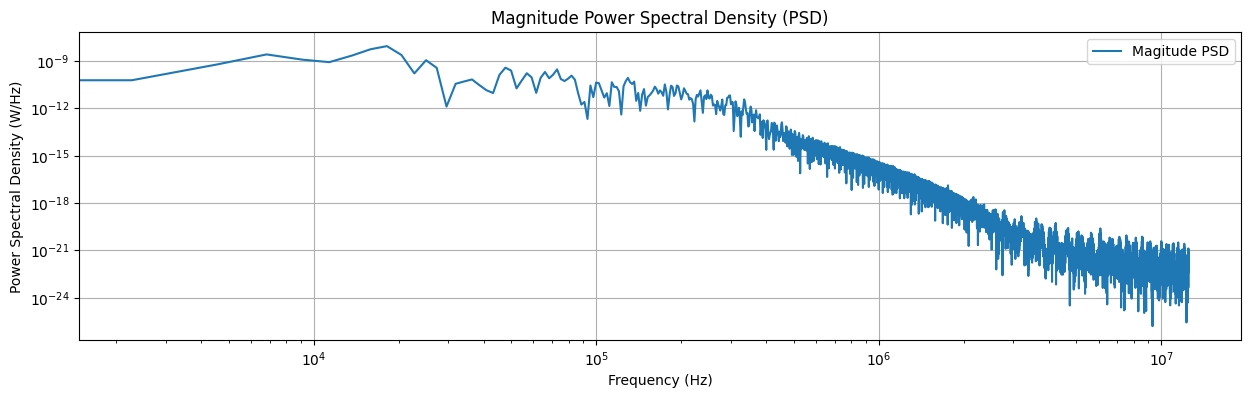

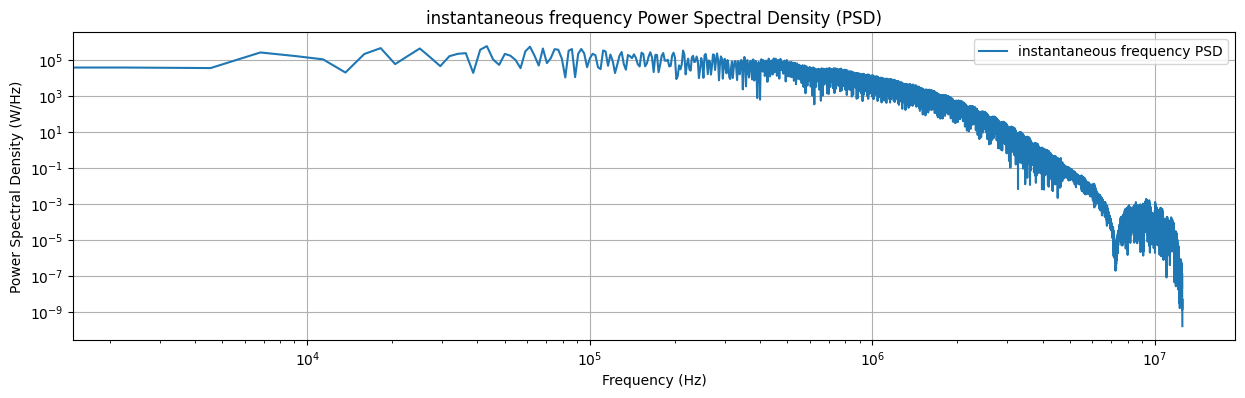

In [10]:
nperseg=16384

# Compute PSD of magnitude using Welch's method

psp_mag, n_psp_mag, frequencies_mag, psd_mag, normalized_psd_mag = power_spectral_density(mag, fs, nperseg=nperseg)

# Compute PSD of phase derivative (instantaneous frequency analysis)
psp_phase, n_psp_phase, frequencies_phase, psd_phase, normalized_psd_phase = power_spectral_density(phase_diff, fs, nperseg=nperseg)

# Graficar la Magnitude PSD 
plt.figure(figsize=(15, 4))
plt.plot(frequencies_mag, psd_mag, label='Magitude PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (W/Hz)')
plt.title('Magnitude Power Spectral Density (PSD)')
plt.grid()
plt.semilogx() 
plt.semilogy() 
plt.legend()
plt.show()

# Graficar la Phase PSD 
plt.figure(figsize=(15, 4))
plt.plot(frequencies_phase, psd_phase, label='instantaneous frequency PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (W/Hz)')
plt.title('instantaneous frequency Power Spectral Density (PSD)')
plt.grid()
plt.semilogx() 
plt.semilogy() 
plt.legend()
plt.show()

### Plot PSD results per each filtered signal

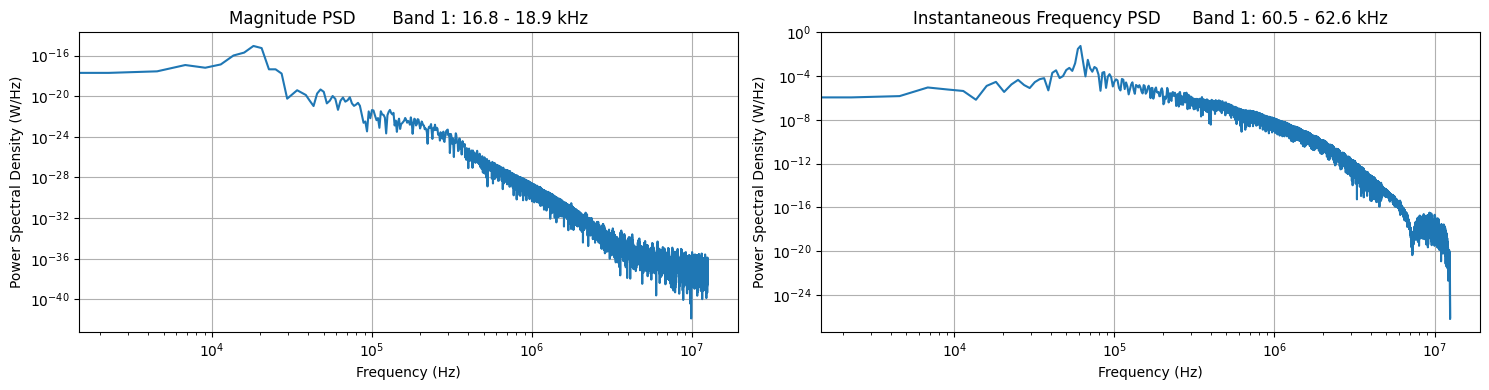

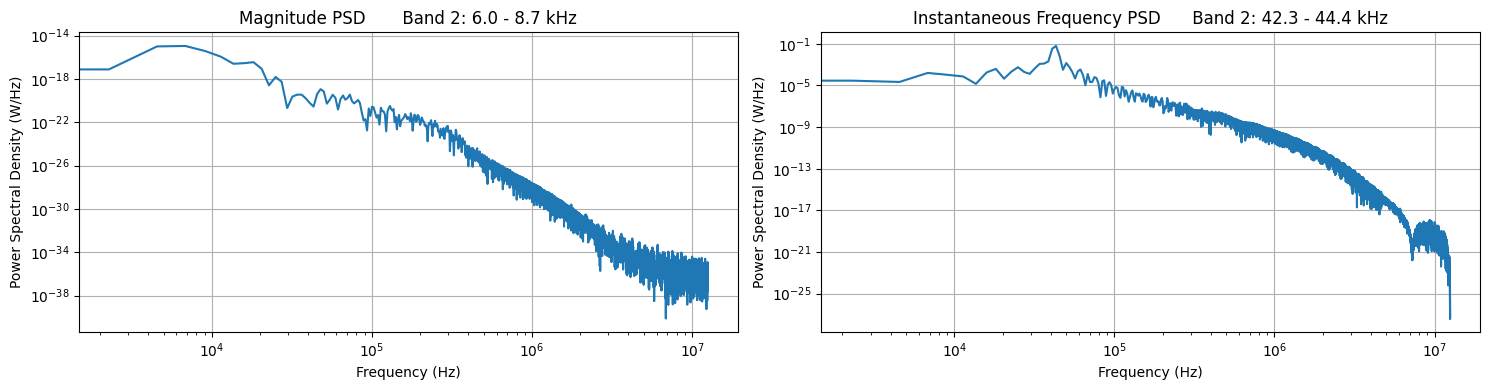

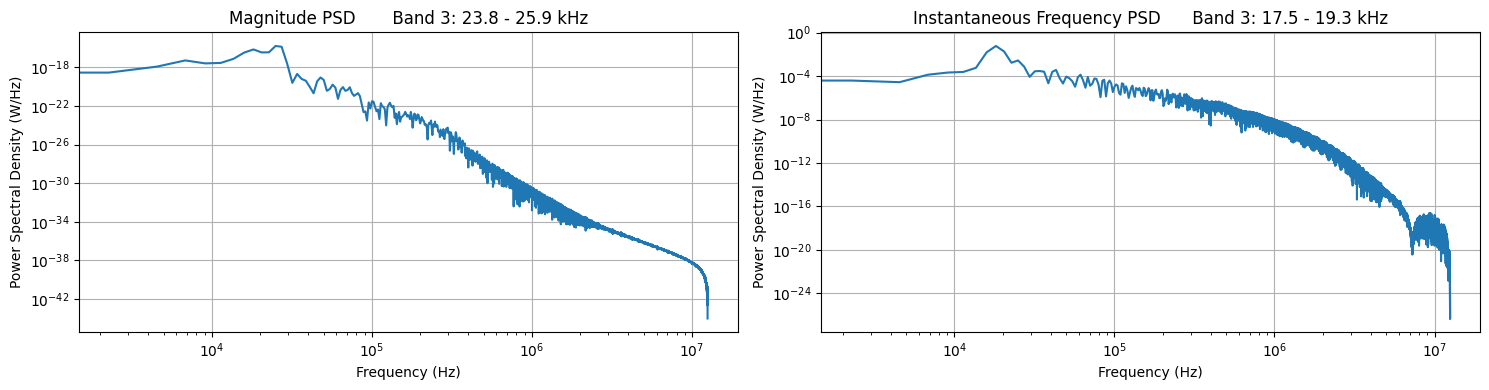

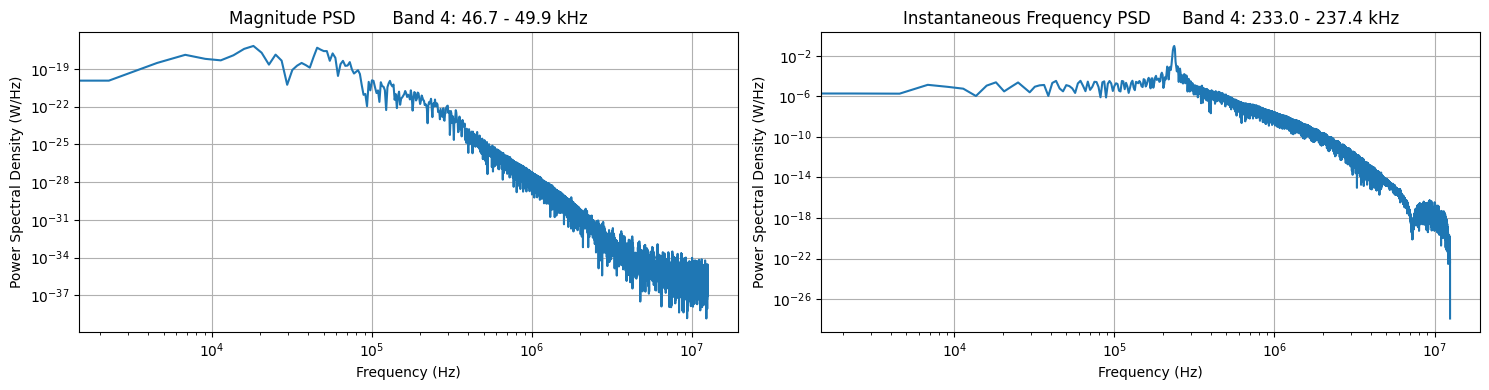

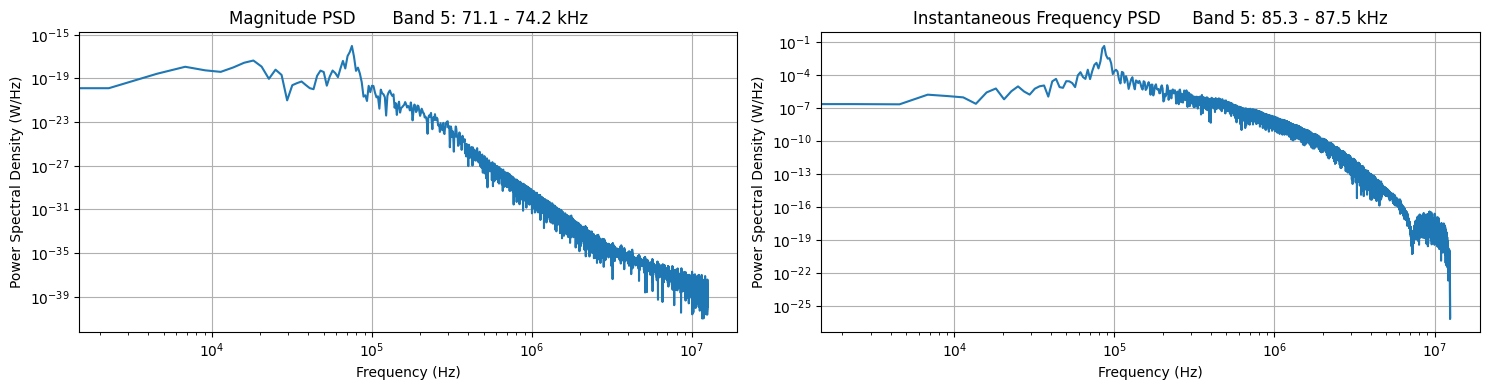

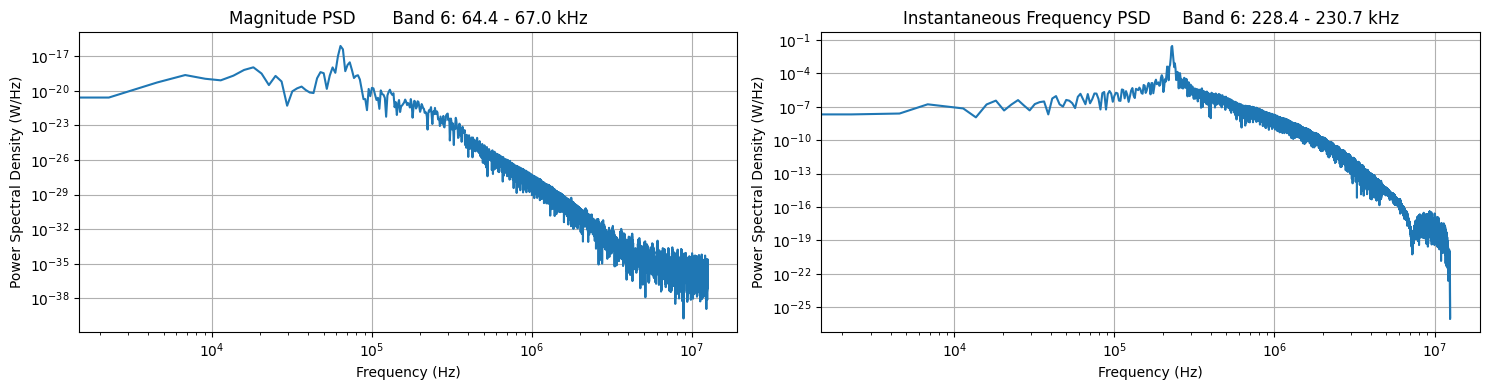

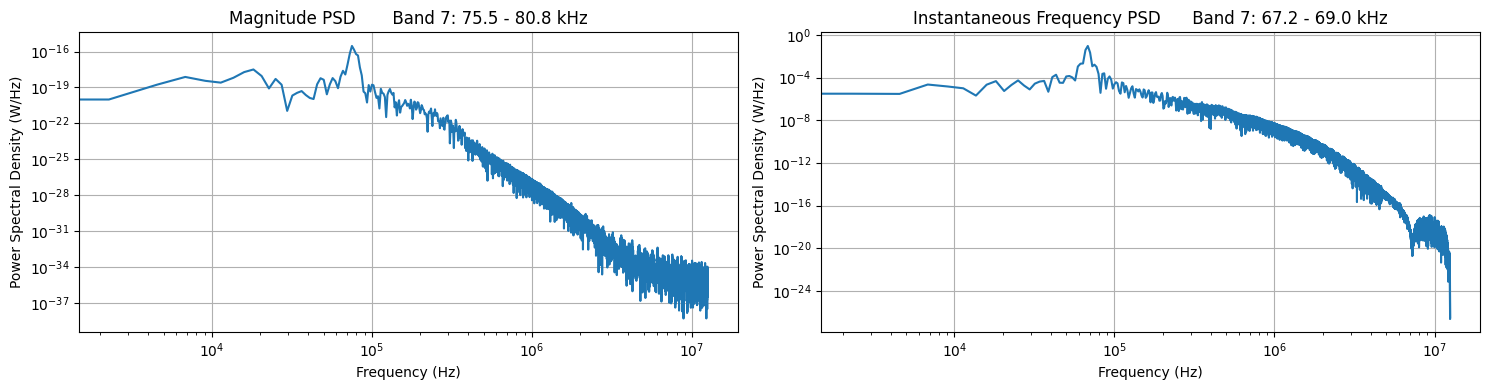

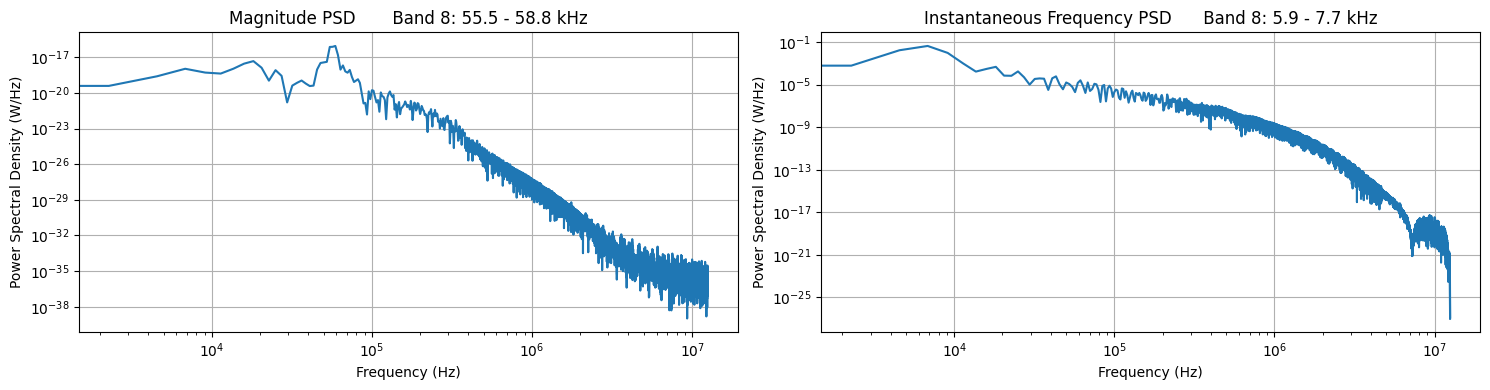

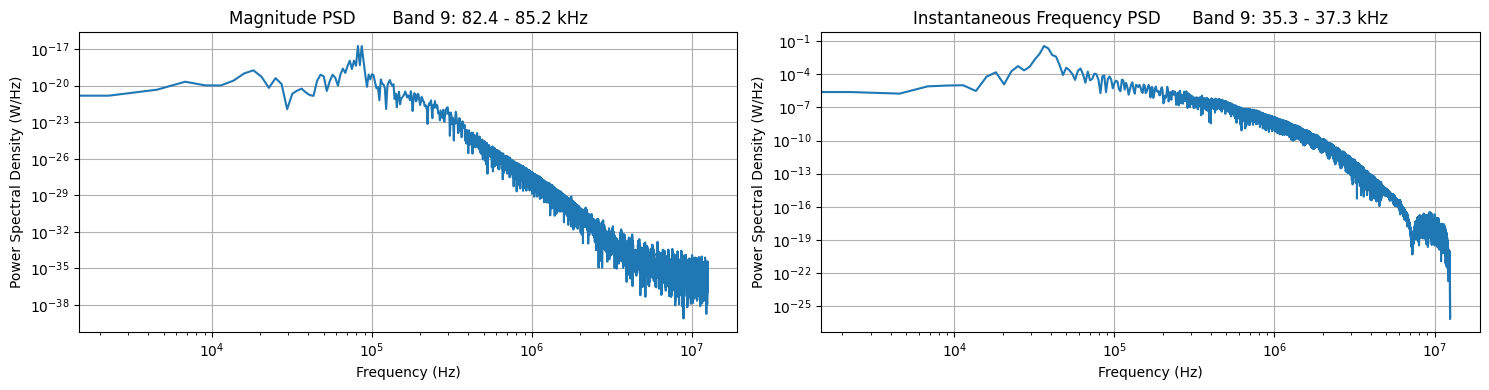

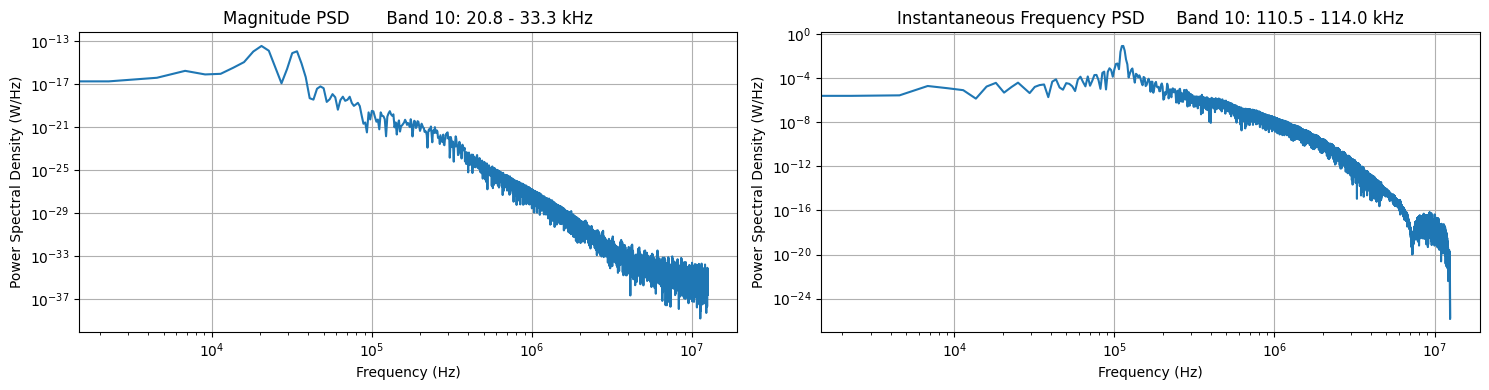

In [11]:
# Función para graficar PSD con eje x en escala logarítmica
def plot_psd_bands(psd_freqs_mag, psd_bands_mag, psd_freqs_phase, psd_bands_phase, bandwidths_mag, bandwidths_phase):
    """
    Grafica la PSD de cada banda filtrada en gráficos separados con el eje x en escala logarítmica.
    
    Parámetros:
    - psd_bands: Lista de tuplas (frecuencias, psd) obtenidas de compute_psd_v.
    - bandwidths: Lista de tuplas con las frecuencias de corte usadas (para etiquetar gráficos).
    """
    for i, (psd_freq_mag, psd_mag, psd_freq_phase, psd_phase, (f_low_mag, f_high_mag), (f_low_phase, f_high_phase)) in enumerate(zip(psd_freqs_mag, psd_bands_mag, psd_freqs_phase, psd_bands_phase, bandwidths_mag, bandwidths_phase)):
        
        # Create a figure with 2 subplots (side by side)
        fig, axs = plt.subplots(1, 2, figsize=(15, 4))
        
        # Convert frequency limits from Hz to kHz and round to 1 decimal place
        low_khz_mag = f_low_mag / 1000.0
        high_khz_mag = f_high_mag / 1000.0
        low_khz_phase = f_low_phase / 1000.0
        high_khz_phase = f_high_phase / 1000.0
        
        # Plot Magnitude PSD
        axs[0].plot(psd_freq_mag, psd_mag)
        axs[0].set_title(f'Magnitude PSD       Band {i+1}: {low_khz_mag:.1f} - {high_khz_mag:.1f} kHz')
        axs[0].set_xlabel('Frequency (Hz)')
        axs[0].set_ylabel('Power Spectral Density (W/Hz)')
        axs[0].semilogx() 
        axs[0].semilogy() 
        axs[0].grid()
        
        # Plot Instantaneous Frequency PSD
        axs[1].plot(psd_freq_phase, psd_phase)
        axs[1].set_title(f'Instantaneous Frequency PSD      Band {i+1}: {low_khz_phase:.1f} - {high_khz_phase:.1f} kHz')
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('Power Spectral Density (W/Hz)')
        axs[1].semilogx()
        axs[1].semilogy() 
        axs[1].grid()
        
        # Adjust layout and display the plots
        plt.tight_layout()
        plt.show()

        

plot_psd_bands(psd_freqs_mag, psd_bands_mag, psd_freqs_phase, psd_bands_phase, bandwidths_mag, bandwidths_phase)



### Compute characteristics

In [12]:
# Extract spectral features
features_mag = extract_features_v(psd_bands_mag, psd_freqs_mag, freqs_mag, values_mag, bandwidths_mag)
features_phase = extract_features_v(psd_bands_phase, psd_freqs_phase, freqs_phase, values_phase, bandwidths_phase)

# Display extracted features
print("Extracted Magnitude Features:")
for i, feature in enumerate(features_mag):
    print(f"Band {i + 1}: {feature}")

# Display extracted features
print("Extracted Instant frequency Features:")
for i, feature in enumerate(features_phase):
    print(f"Band {i + 1}: {feature}")


Extracted Magnitude Features:
Band 1: {'power': 3.987988162136641e-12, 'entropy': 12.982625477275318, 'spectral_centroid': 18189.94644101992, 'psd_mean': 3.1935034447966777e-19, 'psd_variance': 2.0002532240454884e-34, 'l_band': 16779.207446127155, 'h_band': 18875.990179414563, 'frequency_peak': 18181.81818181818, 'Magnitude_peak': 40.28920209050238}
Band 2: {'power': 6.098535193946737e-12, 'entropy': 13.117541871813401, 'spectral_centroid': 6794.7131679779695, 'psd_mean': 4.916475721730072e-19, 'psd_variance': 4.198578238147286e-34, 'l_band': 5977.36816741014, 'h_band': 8724.467850994997, 'frequency_peak': 6818.181818181818, 'Magnitude_peak': 24.741932007798532}
Band 3: {'power': 1.1542822389414491e-12, 'entropy': 13.722289250299218, 'spectral_centroid': 22985.232574329497, 'psd_mean': 9.237053700226072e-20, 'psd_variance': 1.0200941306952465e-35, 'l_band': 23839.271138352404, 'h_band': 25920.48085557488, 'frequency_peak': 24999.999999999996, 'Magnitude_peak': 20.695195955543735}
Band 

In [102]:
# Aplicar la estandarización
standardized_features_mag = standardize_features(features_mag)
standardized_features_phase = standardize_features(features_phase)

# Mostrar los resultados
print("Extracted Magnitude standardize Features:")
for i, feature_dict in enumerate(standardized_features_mag):
    print(f"banda {i+1}: {feature_dict}")

print("Extracted Magnitude standardize Features:")
for i, feature_dict in enumerate(standardized_features_phase):
    print(f"banda {i+1}: {feature_dict}")

Extracted Magnitude standardize Features:
banda 1: {'power': 0.20959542801716277, 'entropy': -1.7909975089070613, 'spectral_centroid': -0.8986500185228757, 'psd_mean': 0.20042190469355184, 'psd_variance': -0.1693880168599454, 'l_band': -0.9315438174466105, 'h_band': -0.9348854729407258, 'frequency_peak': -0.9267529023582541, 'Magnitude_peak': 2.282369637495852}
banda 2: {'power': 2.9473104529071676, 'entropy': -0.23099005337559445, 'spectral_centroid': -1.007299461418233, 'psd_mean': 2.9490725714547366, 'psd_variance': 2.995475707152921, 'l_band': -1.0509728486129295, 'h_band': -1.0257999112105944, 'frequency_peak': -1.0530135157585612, 'Magnitude_peak': 1.1570362420572504}
banda 3: {'power': -0.29621651926220416, 'entropy': -0.22459194681669384, 'spectral_centroid': -0.8409431491165847, 'psd_mean': -0.2968178708371935, 'psd_variance': -0.34732100364249086, 'l_band': -0.853154232983075, 'h_band': -0.8576914042830749, 'frequency_peak': -0.8509965343180699, 'Magnitude_peak': 0.8494430226

### create dataset and metadata

In [16]:
features, metadata = create_feature_matrix(standardized_features_mag, standardized_features_phase, sat_label=1, transmitter_label=1, feature_counter=1)

# Print results for verification
print("Feature Matrix Shape:", features.shape)
print("Feature Matrix Name:", metadata["Feature_Matrix_Name"])
print("Metadata:", json.dumps(metadata, indent=2))

Feature Matrix Shape: (80, 9)
Feature Matrix Name: features_1
Metadata: {
  "Satellite_Label": 1,
  "Transmitter_Label": 1,
  "Feature_Matrix_Name": "features_1",
  "Normalized": "False",
  "Colum_Feature_Names": [
    "power",
    "entropy",
    "spectral_centroid",
    "psd_mean",
    "psd_variance",
    "l_band",
    "h_band",
    "frequency_peak",
    "Magnitude_peak"
  ],
  "Rows": [
    "Magnitude_Band_1",
    "Magnitude_Band_2",
    "Magnitude_Band_3",
    "Magnitude_Band_4",
    "Magnitude_Band_5",
    "Magnitude_Band_6",
    "Magnitude_Band_7",
    "Magnitude_Band_8",
    "Magnitude_Band_9",
    "Magnitude_Band_10",
    "Magnitude_Band_11",
    "Magnitude_Band_12",
    "Magnitude_Band_13",
    "Magnitude_Band_14",
    "Magnitude_Band_15",
    "Magnitude_Band_16",
    "Magnitude_Band_17",
    "Magnitude_Band_18",
    "Magnitude_Band_19",
    "Magnitude_Band_20",
    "Magnitude_Band_21",
    "Magnitude_Band_22",
    "Magnitude_Band_23",
    "Magnitude_Band_24",
    "Magnitude_Ba

Save the results

In [ ]:

features_dir = "../../features/" # Define the relative directory path for the features folder
os.makedirs(features_dir, exist_ok=True) # Ensure the features directory exists, create it if it doesn't

# Save the feature matrix and metadata to the features folder
np.save(os.path.join(features_dir, f"{metadata['Feature_Matrix_Name']}.npy"), features)
with open(os.path.join(features_dir, f"{metadata['Feature_Matrix_Name']}_metadata.json"), "w") as f:
    json.dump(metadata, f, indent=2)